# chap20 전이학습을 통한 딥러닝의 성능 극대화

1. 소규모 데이터셋으로 만드는 강력한 학습모델

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout,Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

import numpy as np
import matplotlib.pyplot as plt


In [18]:
train_datagen=ImageDataGenerator(rescale=1./255, #정규화
                   horizontal_flip=True, #수평으로 뒤집기
                   width_shift_range=0.1, #수평이동
                   height_shift_range=0.1, #수직이동
                   fill_mode='nearest') #빈공간 채우는 방법


train_generator=train_datagen.flow_from_directory('./generator/train/',
                                                target_size=(150,150),
                                                batch_size=5,
                                                class_mode='binary')

test_datagen=ImageDataGenerator(rescale=1./255, #정규화
                   horizontal_flip=True, #수평으로 뒤집기
                   width_shift_range=0.1, #수평이동
                   height_shift_range=0.1, #수직이동
                   fill_mode='nearest') #빈공간 채우는 방법


test_generator=train_datagen.flow_from_directory('./generator/test/',
                                                target_size=(150,150),
                                                batch_size=5,
                                                class_mode='binary')


Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [19]:
model=Sequential()
model.add(Conv2D(32, kernel_size=3,input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 activation_5 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 34, 34, 64)       

In [20]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(learning_rate=0.0002),metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0)

history=model.fit(train_generator,validation_data=test_generator,epochs=100,callbacks=[early_stopping],verbose=1,validation_steps=10)

Epoch 1/100
32/32 [==============================] - 6s 141ms/step - loss: 0.6972 - accuracy: 0.5000 - val_loss: 0.6871 - val_accuracy: 0.5800
Epoch 2/100
32/32 [==============================] - 3s 89ms/step - loss: 0.6906 - accuracy: 0.5375 - val_loss: 0.6838 - val_accuracy: 0.6800
Epoch 3/100
32/32 [==============================] - 3s 83ms/step - loss: 0.6810 - accuracy: 0.5875 - val_loss: 0.6639 - val_accuracy: 0.7400
Epoch 4/100
32/32 [==============================] - 3s 79ms/step - loss: 0.6655 - accuracy: 0.6000 - val_loss: 0.6600 - val_accuracy: 0.7200
Epoch 5/100
32/32 [==============================] - 3s 80ms/step - loss: 0.6435 - accuracy: 0.6250 - val_loss: 0.6242 - val_accuracy: 0.7000
Epoch 6/100
32/32 [==============================] - 3s 78ms/step - loss: 0.6316 - accuracy: 0.6625 - val_loss: 0.6437 - val_accuracy: 0.6000
Epoch 7/100
32/32 [==============================] - 2s 76ms/step - loss: 0.5923 - accuracy: 0.7125 - val_loss: 0.5580 - val_accuracy: 0.7400
Epoch

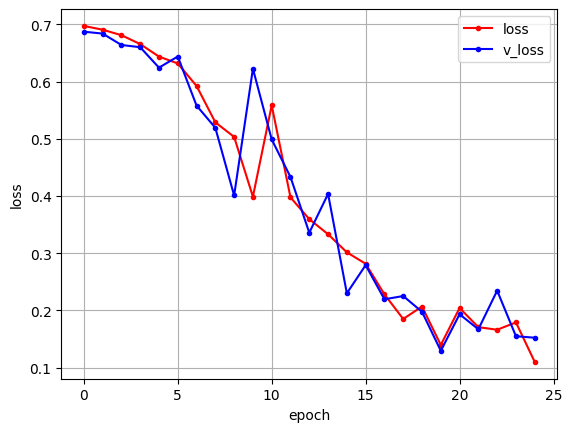

In [23]:
y_vloss=history.history['val_loss']
y_loss=history.history['loss']
x_len=np.arange(len(y_vloss))
plt.plot(x_len,y_loss,label='loss',marker='.',c='red')
plt.plot(x_len,y_vloss,label='v_loss',marker='.',c='blue')
plt.legend(loc='upper right')
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()